<a href="https://www.kaggle.com/code/fareselmenshawii/logistic-regression-from-scratch?scriptVersionId=121545986" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div class="table-of-contents" style="background-color:#41BEB9; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
  <h1 style="color:#000000;">TOC</h1>
<ol>
    <li><a href="#1" style="color: #000000;">1. Overview</a></li>
      <li><a href="#2" style="color: #000000;">2. Imports</a></li>
    <li><a href="#3" style="color: #000000;">3. Data Analysis</a></li>
    <li><a href="#4" style="color: #000000;">4. Data Preprocessing</a></li>
    <li><a href="#5" style="color: #000000;">5. Model Implementation</a></li>
    <li><a href="#6" style="color: #000000;">6. Evaluation</a></li>
    <li><a href="#7" style="color: #000000;">7. Conclusion</a></li>
  </ol>
</div>

<a id="1"></a>
<h1 style='background:#41BEB9;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Overview</center></h1>
    
    
# Overview
**Previously we've implemented our first regression algorithm [Linear Regression](https://www.kaggle.com/code/fareselmenshawii/from-scratch-linear-regression)**

**In this notebook we'll be implementing our first classification algorithm**

**Let's get started**    

<a id="2"></a>
<h1 style='background:#41BEB9;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Imports</center></h1>
    
# Imports

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<a id="3"></a>
<h1 style='background:#41BEB9;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Analysis</center></h1>
    
# Data Analysis

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


In [5]:
px.histogram(data_frame=df,x='area_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [6]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [7]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [8]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [9]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [10]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


In [11]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


In [12]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])


<a id="4"></a>
<h1 style='background:#41BEB9;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Preprocessing </center></h1>
    
# Data Preprocessing

In [13]:
df.drop('id', axis=1, inplace=True) #drop redundant columns


In [14]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

**Now let's get highly correlated features with the target**

In [15]:
corr = df.corr()

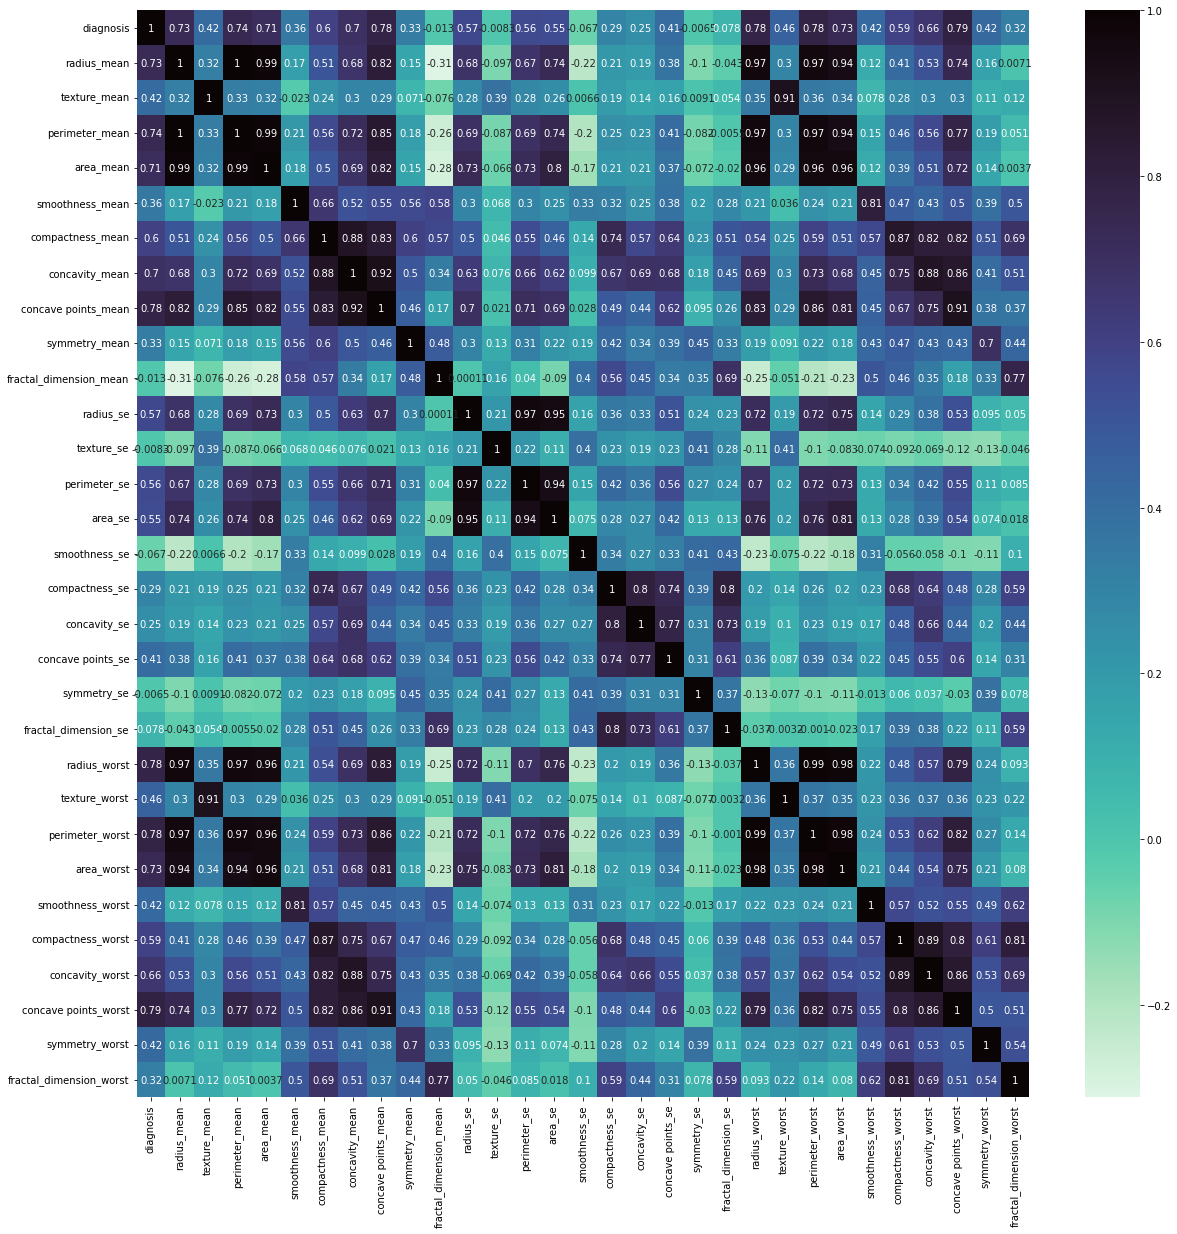

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [17]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
print(names)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [18]:
X = df[names].values
y = df['diagnosis'].values

In [19]:
def scale(X):
    """
    Standardizes the data in the array X.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).

    Returns:
        numpy.ndarray: The standardized features array.
    """
    # Calculate the mean and standard deviation of each feature
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Standardize the data
    X = (X - mean) / std

    return X


In [20]:
X = scale(X)

In [21]:
def train_test_split(X, y, random_state=42, test_size=0.2):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).
        y (numpy.ndarray): Target array of shape (n_samples,).
        random_state (int): Seed for the random number generator. Default is 42.
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Get number of samples
    n_samples = X.shape[0]

    # Set the seed for the random number generator
    np.random.seed(random_state)

    # Shuffle the indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Determine the size of the test set
    test_size = int(n_samples * test_size)

    # Split the indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split the features and target arrays into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

<a id="5"></a>
<h1 style='background:#41BEB9;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Model Implementation</center></h1>


# Model Implementation

# Model

**Now let's start implementing the model**

**As always we'll be using [vectorized implementaiton](https://www.kaggle.com/code/fareselmenshawii/vectorization)**

**For Logistic Regression model is represented by:**
$$ f_{\mathbf{w},b}(\mathbf{x}) = g(\mathbf{w}\cdot \mathbf{x} + b)$$

where $\mathbf{w}$ is the weight vector, $b$ is the bias term and $g(z)$ is the sigmoid function:

$$ g(z) = \frac{1}{1+e^{-z}}$$

## Forward Propagation
**The forward propagation function computes the linear combination of input features $\mathbf{X}$ with the weight vector $\mathbf{W}$ and the bias term $b$ and then applies the sigmoid function to the result:**

**$$ Z = \mathbf{X}\mathbf{W} + b $$**

**$$ A = \sigma(Z) $$**

## Cost
**The cost function measures the error between the predicted values and the true labels. In logistic regression, we use the binary cross-entropy loss function:**

**$$ J(\mathbf{w},b) = \frac{1}{m}\sum_{i=0}^{m-1} \left[ -y_i \log\left(f_{\mathbf{w},b}\left( \mathbf{x}i \right) \right) - \left( 1 - y_i\right) \log \left( 1 - f{\mathbf{w},b}\left( \mathbf{x}_i \right) \right) \right] $$**

**where $m$ is the number of samples, $y_i$ is the true label of sample $i$ and** **$f_{\mathbf{w},b}\left( \mathbf{x}_i \right)$ is the predicted value of sample $i$.**

## BackPropagation
**The backpropagation algorithm calculates the gradients of the cost function with respect to the parameters $\mathbf{W}$ and $b$. The gradients are then used to update the parameters in the direction that minimizes the cost function.**
$$
\frac{\partial J(\mathbf{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{}) - \mathbf{y}^{}) 
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{}) - \mathbf{y}^{})x^{}  
$$




**Visualize the shape of the  Logistic function**

In [23]:
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

z = np.linspace(-12, 12, 200)
fig = px.line(x=z, y=sigmoid(z),title='Logistic Function',template="plotly_dark")
fig.update_layout(
    title_font_color="#41BEE9", 
    xaxis=dict(color="#41BEE9"), 
    yaxis=dict(color="#41BEE9") 
)
fig.show()

In [24]:
 class LogisticRegression:
    """
    Logistic Regression model.

    Parameters:
        learning_rate (float): Learning rate for the model.

    Methods:
        initialize_parameter(): Initializes the parameters of the model.
        sigmoid(z): Computes the sigmoid activation function for given input z.
        forward(X): Computes forward propagation for given input X.
        compute_cost(predictions): Computes the cost function for given predictions.
        compute_gradient(predictions): Computes the gradients for the model using given predictions.
        accuracy(predictions, y): Computes the accuracy for given predictions and true labels y.
        fit(X, y, iterations, plot_cost): Trains the model on given input X and labels y for specified iterations.
        predict(X): Predicts the labels for given input X.
    """

    def __init__(self, learning_rate=0.0001):
        np.random.seed(1)
        self.learning_rate = learning_rate

    def initialize_parameter(self):
        """
        Initializes the parameters of the model.
        """
        self.W = np.zeros(self.X.shape[1])
        self.b = 0.0

    def sigmoid(self, z):
        """
        Computes the sigmoid activation function for given input z.

        Parameters:
            z (numpy.ndarray): Input array.

        Returns:
            numpy.ndarray: Output array.
        """
        sigmoid = 1 / (1 + np.exp(-z))
        return sigmoid

    def forward(self, X):
        """
        Computes forward propagation for given input X.

        Parameters:
            X (numpy.ndarray): Input array.

        Returns:
            numpy.ndarray: Output array.
        """
        Z = np.matmul(X, self.W) + self.b
        A = self.sigmoid(Z)
        return A

    def compute_cost(self, predictions):
        """
        Computes the cost function for given predictions.

        Parameters:
            predictions (numpy.ndarray): Predictions of the model.

        Returns:
            float: Cost of the model.
        """
        m = self.X.shape[0]  # number of training examples
        # compute the cost
        cost = np.sum((-np.log(predictions + 1e-8) * self.y) + (-np.log(1 - predictions + 1e-8)) * (
                1 - self.y))  # we are adding small value epsilon to avoid log of 0
        cost = cost / m
        return cost

    def compute_gradient(self, predictions):
        """
        Computes the gradients for the model using given predictions.

        Parameters:
            predictions (numpy.ndarray): Predictions of the model.
        """
        # get training shape
        m = self.X.shape[0]

        # compute gradients
        self.dW = np.matmul(self.X.T, (predictions - self.y))
        self.dW = np.array([np.mean(grad) for grad in self.dW])

        self.db = np.sum(np.subtract(predictions, self.y))

        # scale gradients
        self.dW = self.dW * 1 / m
        self.db = self.db * 1 / m

    def accuracy(self, predictions, y):
        """
        Computes the accuracy for given predictions and true labels y.

        Parameters:
            predictions (numpy.ndarray): Predictions of the model.
            y (numpy.ndarray): True labels.

        Returns:
            float: Accuracy of the model.
        """
        apredictions = np.round(predictions)
        accuracy = np.mean(apredictions == y)
        return accuracy

    def fit(self, X, y, iterations, plot_cost=True):
        """
        Trains the model on given input X and labels y for specified iterations.

        Parameters:
            X (numpy.ndarray): Input features array of shape (n_samples, n )
            y (numpy.ndarray): Labels array of shape (n_samples, 1)
            iterations (int): Number of iterations for training.
            plot_cost (bool): Whether to plot cost over iterations or not.

        Returns:
            None.
        """
        self.X = X
        self.y = y

        self.initialize_parameter()

        costs = []
        for i in range(iterations):
            # forward propagation
            predictions = self.forward(self.X)

            # compute cost
            cost = self.compute_cost(predictions)
            costs.append(cost)

            # compute gradients
            self.compute_gradient(predictions)

            # update parameters
            self.W = self.W - self.learning_rate * self.dW
            self.b = self.b - self.learning_rate * self.db

            # print cost every 100 iterations
            if i % 10000 == 0:
                print("Cost after iteration {}: {}".format(i, cost))

        if plot_cost:
            fig = px.line(y=costs,title="Cost vs Iteration",template="plotly_dark")
            fig.update_layout(
                title_font_color="#41BEE9", 
                xaxis=dict(color="#41BEE9",title="Iterations"), 
                yaxis=dict(color="#41BEE9",title="cost")
            )
            fig.show()


    def predict(self, X):
        """
        Predicts the labels for given input X.

        Parameters:
            X (numpy.ndarray): Input features array.

        Returns:
            numpy.ndarray: Predicted labels.
        """
        predictions = self.forward(X)
        return np.round(predictions)

In [25]:
lg = LogisticRegression()

lg.fit(X_train, y_train,100000)

Cost after iteration 0: 0.6931471605599454
Cost after iteration 10000: 0.25491458609215495
Cost after iteration 20000: 0.19319835490246415
Cost after iteration 30000: 0.16495706373768645
Cost after iteration 40000: 0.1480968570026169
Cost after iteration 50000: 0.13667710818661877
Cost after iteration 60000: 0.128320786412241
Cost after iteration 70000: 0.12187625857490858
Cost after iteration 80000: 0.11671439879815725
Cost after iteration 90000: 0.11246068240740179


In [26]:
predictions = lg.predict(X)

In [27]:
lg.accuracy(predictions, y)

0.9753954305799648

<a id="6"></a>
<h1 style='background:#41BEB9;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Evaluation</center></h1>
    
    
    
# Evaluation

**Evaluate the results on the test set**

In [28]:
predictions = lg.predict(X_test)
lg.accuracy(predictions, y_test)

0.9823008849557522

<a id="7"></a>
<h1 style='background:#41BEB9;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Conclusion</center></h1>
    
    
    
# Conclusion

**We were able to implement Logistic Regression from scratch**


**Thank you for going through this notebook please leave your feedback**

**For Logistic Regression sklearn implementation please refer to this [notebook](https://www.kaggle.com/code/fareselmenshawii/logistic-regression)**

**Now that we know how to implement Linear Regression from scratch let's check [sklearn implementation](https://www.kaggle.com/code/fareselmenshawii/linear-regression)**

# 

<div style="padding:10px; 
            color:#333333;
            margin:10px;
            font-size:150%;
            display:fill;
            border-radius:1px;
            border-style:solid;
            border-color:#666666;
            background-color:#F9F9F9;
            overflow:hidden;">
    <center>
        <a id='top'></a>
        <b>Machine Learning From Scratch Series</b>
    </center>
    <br>
    <ul>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/linear-regression-from-scratch" style="color:#0072B2">1 - Linear Regression</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/logistic-regression-from-scratch" style="color:#0072B2">2 -  Logistic Regression</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/kmeans-from-scratch" style="color:#0072B2">3 - KMeans</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/decision-tree-classifier-from-scratch" style="color:#0072B2">4 - Decision Trees</a>
        </li> 
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/random-forest-classifier-from-scratch" style="color:#0072B2">5 -  Random Forest</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/knn-from-scratch" style="color:#0072B2">6 - KNearestNeighbor</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/pca-from-scratch?scriptVersionId=121402593" style="color:#0072B2">7 - PCA</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/svm-from-scratch" style="color:#0072B2">8 - SVM</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/naive-bayes-from-scratch" style="color:#0072B2">9 - Naive Baye</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/optimized-neural-network-from-scratch" style="color:#0072B2">10 - Optimized Neural Network</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/neural-network-from-scratch" style="color:#0072B2">11 - Neural Network</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/cnn-from-scratch" style="color:#0072B2">12 - CNN</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/rnn-from-scratch" style="color:#0072B2">13 - RNN</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/lstm-from-scratch" style="color:#0072B2">14 - LSTM</a>
        </li>
        <li>
            <a href="https://www.kaggle.com/code/fareselmenshawii/gru-from-scratch" style="color:#0072B2">15 - GRU</a>
        </li>
    </ul>
</div>